# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [ ]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [ ]:
# your code(s)
data=pd.read_csv('/content/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000



* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * No



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

Initial MSE: 3.291713444911963


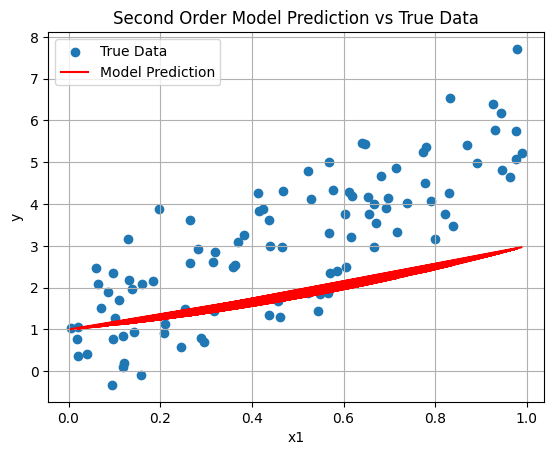

In [ ]:
# your code to plot the cost function (if required)
import numpy as np

# Define the second-order model equation
def second_order_model(w1, w2, b, x1):
    return w1 * x1**2 + w2 * x1 + b

# Define the Mean Squared Error (MSE) cost function
def mse_cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Example usage:
# Generate some sample data
np.random.seed(0)
x1 = np.random.rand(100)  # example input
y_true = 3 * x1**2 + 2 * x1 + 1 + np.random.randn(100)  # example output with noise

# Initialize parameters
w1_initial = 1.0
w2_initial = 1.0
b_initial = 1.0

# Evaluate the model with initial parameters
y_pred_initial = second_order_model(w1_initial, w2_initial, b_initial, x1)

# Calculate the initial MSE
initial_mse = mse_cost_function(y_true, y_pred_initial)
print("Initial MSE:", initial_mse)

def plot_model_data(x1, y_true, y_pred):
    plt.scatter(x1, y_true, label='True Data')
    plt.plot(x1, y_pred, color='red', label='Model Prediction')
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.title('Second Order Model Prediction vs True Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Plot the initial model prediction and true data
plot_model_data(x1, y_true, y_pred_initial)

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Your answer
* Explain why you said yes or no to the above questions.
> * Your answer

**Derivatives of cost function:**
$$Your \; answer$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$your\;answer$$

## Implementation of the model

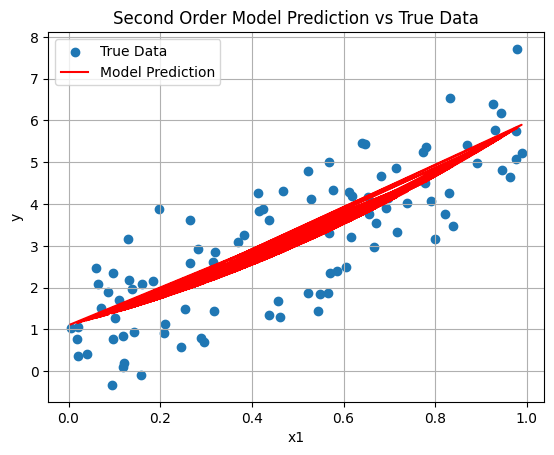

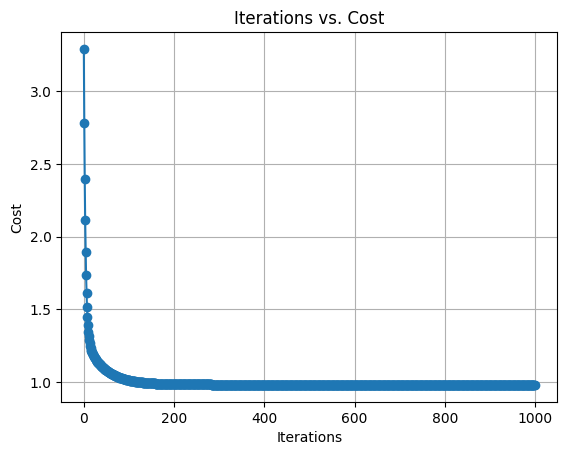

Final Parameters:
w1: 2.1142139279384455
w2: 2.7572621651126927
b: 1.1063830730496844
Final Cost: 0.9785719117504815


In [ ]:
# Write a code/ function to do the following


# function for your model
def second_order_model(w1, w2, b, x1):
    return w1 * x1**2 + w2 * x1 + b
# a function for your cost function
def mse_cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# function to calculate the derivatives
def compute_gradients(x1, y_true, y_pred):
    dw1 = np.mean((y_pred - y_true) * x1**2)
    dw2 = np.mean((y_pred - y_true) * x1)
    db = np.mean(y_pred - y_true)
    return dw1, dw2, db
# code to estimate the parametes using gradient descent
def gradient_descent(x1, y_true, learning_rate=0.01, num_iterations=100):
    # Initialize parameters
    w1 = 1.0
    w2 = 1.0
    b = 1.0
    costs = []
# Aslo estimate the cost function in each iteration
    for i in range(num_iterations):
        y_pred = second_order_model(w1, w2, b, x1)
        cost = mse_cost_function(y_true, y_pred)
        costs.append(cost)
        dw1, dw2, db = compute_gradients(x1, y_true, y_pred)
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b -= learning_rate * db

    return w1, w2, b, costs
# Plot the model with the data given
def plot_model_data(x1, y_true, y_pred):
    plt.scatter(x1, y_true, label='True Data')
    plt.plot(x1, y_pred, color='red', label='Model Prediction')
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.title('Second Order Model Prediction vs True Data')
    plt.legend()
    plt.grid(True)
    plt.show()
# plot the iteratio VS cost
def plot_iteration_vs_cost(iterations, costs):
    plt.plot(iterations, costs, marker='o', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Iterations vs. Cost')
    plt.grid(True)
    plt.show()

# estimate the solution to the given problem
w1, w2, b, costs = gradient_descent(x1, y_true, learning_rate=0.1, num_iterations=1000)

# mark the point or result in the graph (plot)
y_pred = second_order_model(w1, w2, b, x1)
plot_model_data(x1, y_true, y_pred)
plot_iteration_vs_cost(range(len(costs)), costs)
# Estimate the model performance
print("Final Parameters:")
print("w1:", w1)
print("w2:", w2)
print("b:", b)
print("Final Cost:", costs[-1])

### Answer the following

* What is learning rate?
> * The learning rate is like a step size. It decides how big a step we take when trying to find the best values for our model. If the step is too small, it can take a long time to reach the best values. If it's too big, we might miss the best values or even go in the wrong direction. So, it's important to choose the right learning rate for faster and more accurate learning.
* What will happen if the learning rate is too large?
> * If the learning rate is too large, the model might skip over the best solution and keep bouncing around without getting better. This can make the training process unstable and the model might not work well even if it seems to do well on the training data.
* What will happen if the learning rate is too small?
> * If the learning rate is too small, the model will take tiny steps towards the best solution, making the training process very slow.
If you what to change the second order (quadratic) model to third
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Model Function
> * Gradient Computation
> * Gradient Descen
> * Initialization
> * Plotting